# Decision Trees


Decision trees are widely used models for classification and regression tasks. 

Essentially, they learn a **hierarchy of if/else questions**, leading to a decision

These questions are similar to the questions you might ask in a game of 20 Questions.
Imagine you want to distinguish between the following four animals: bears, hawks,
penguins, and dolphins. Your goal is to get to the right answer by asking as few if/else
questions as possible. You might start off by asking whether the animal has feathers, a
question that narrows down your possible animals to just two. If the answer is “yes,”
you can ask another question that could help you distinguish between hawks and
penguins. For example, you could ask whether the animal can fly. If the animal
doesn’t have feathers, your possible animal choices are dolphins and bears, and you
will need to ask a question to distinguish between these two animals—for example,
asking whether the animal has fins

This series of questions can be expressed as a decision tree

In [2]:
import sys
!{sys.executable} -m pip install  graphviz


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


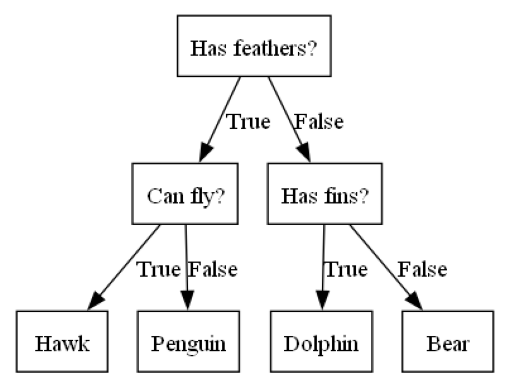

In [4]:
import mglearn
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
mglearn.plots.plot_animal_tree()

In this illustration, each node in the tree either represents a question or a terminal
node (also called a leaf) that contains the answer

==============================================================================

### Building decision trees

Let’s go through the process of building a decision tree for the 2D classification data‐
set shown in Figure 2-23. The dataset consists of two half-moon shapes, with each
class consisting of 75 data points. We will refer to this dataset as two_moons.

Learning a decision tree means learning the sequence of if/else questions that gets us
to the true answer most quickly. In the machine learning setting, these questions are
called tests (not to be confused with the test set, which is the data we use to test to see
how generalizable our model is). Usually data does not come in the form of binary
yes/no features as in the animal example, but is instead represented as continuous
features such as in the 2D dataset. The tests that are used on
continuous data are of the form “Is feature i larger than value a?”

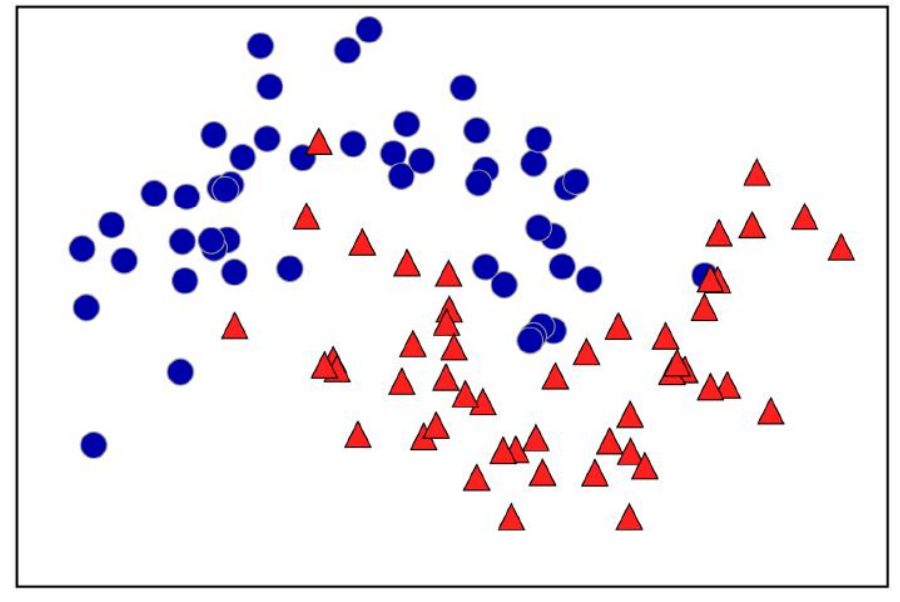

 the most information; it
best separates the points in class 1 from the points in class 2. The top node, also called
the root, represents the whole dataset, consisting of 75 points belonging to class 0 and
75 points belonging to class 1. The split is done by testing whether x[1] <= 0.0596,
indicated by a black line. If the test is true, a point is assigned to the left node, which
contains 2 points belonging to class 0 and 32 points belonging to class 1. Otherwise
the point is assigned to the right node, which contains 48 points belonging to class 0
and 18 points belonging to class 1. These two nodes correspond to the top and bot‐
tom regions shown in Figure 2-24. Even though the first split did a good job of sepa‐
rating the two classes, the bottom region still contains points belonging to class 0, and
the top region still contains points belonging to class 1. We can build a more accurate
model by repeating the process of looking for the best test in both regions.

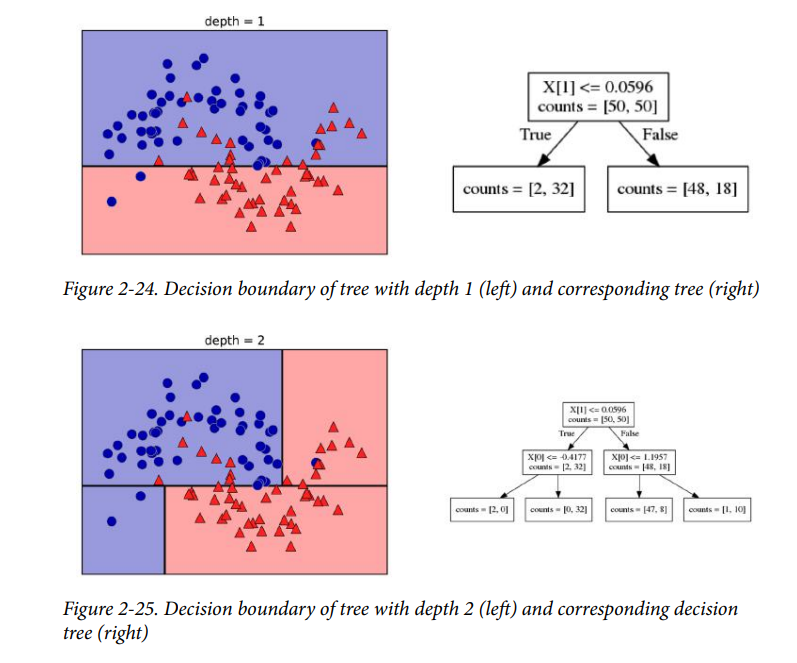

The recursive partitioning of the data is repeated until each region in the partition
(each leaf in the decision tree) only contains a single target value (a single class or a
single regression value). A leaf of the tree that contains data points that all share the
same target value is called **pure**. The final partitioning for this dataset is shown in
Figure 2-26.

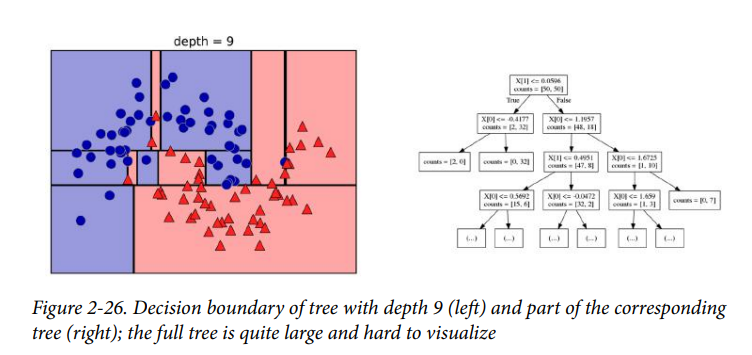

Typically, building a tree as described here and continuing until all leaves are pure
leads to models that are very complex and highly overfit to the training data. The
presence of pure leaves mean that a tree is 100% accurate on the training set; each
data point in the training set is in a leaf that has the correct majority class. The over‐
fitting can be seen on the left of Figure 2-26. You can see the regions determined to
belong to class 1 in the middle of all the points belonging to class 0. On the other
hand, there is a small strip predicted as class 0 around the point belonging to class 0
to the very right. This is not how one would imagine the decision boundary to look,
and the decision boundary focuses a lot on single outlier points that are far away
from the other points in that class.


There are two common strategies to prevent overfitting: stopping the creation of the
tree early (also called pre-pruning), or building the tree but then removing or collaps‐
ing nodes that contain little information (also called post-pruning or just pruning).
Possible criteria for pre-pruning include limiting the maximum depth of the tree,
limiting the maximum number of leaves, or requiring a minimum number of points
in a node to keep splitting it.


==========================================================================================

Pruning in machine learning refers to techniques that control the growth of decision trees to prevent overfitting. There are two main types:

1. Pre-Pruning (Early Stopping):

Limits tree growth during construction by setting conditions like maximum depth, minimum samples split, or minimum samples per leaf.

2. Post-Pruning (Cost-Complexity Pruning):

Grows a complete tree and then selectively removes branches based on a cost-complexity metric, balancing fit improvement with tree complexity.
Both aim to enhance generalization to new data by avoiding overly complex trees that capture noise in the training set.

Decision trees in scikit-learn are implemented in the DecisionTreeRegressor and
DecisionTreeClassifier classes. scikit-learn only implements pre-pruning, not
post-pruning

Let’s look at the effect of pre-pruning in more detail on the Breast Cancer dataset. As
always, we import the dataset and split it into a training and a test part. 

Then we build a model using the default setting of fully developing the tree (growing the tree until
all leaves are pure). 

We fix the random_state in the tree, which is used for tiebreaking internally:


The random_state parameter is a seed for the random number generator used in machine learning algorithms; its value, such as 42, ensures reproducibility by making random processes consistent across runs.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


As expected, the accuracy on the training set is 100%—because the leaves are pure,
the tree was grown deep enough that it could perfectly memorize all the labels on the
training data. The test set accuracy is slightly worse than for the linear models we
looked at previously, which had around 95% accuracy.


If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep
and complex. Unpruned trees are therefore prone to overfitting and not generalizing
well to new data. Now let’s apply pre-pruning to the tree, which will stop developing
the tree before we perfectly fit to the training data. One option is to stop building the
tree after a certain depth has been reached. Here we set max_depth=4, meaning only
four consecutive questions can be asked (cf. Figures 2-24 and 2-26). Limiting the
depth of the tree decreases overfitting. This leads to a lower accuracy on the training
set, but an improvement on the test set:


In [8]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.951


=========================================================================================================

We can visualize the tree using the export_graphviz function from the tree module.
This writes a file in the .dot file format, which is a text file format for storing graphs.
We set an option to color the nodes to reflect the majority class in each node and pass
the class and features names so the tree can be properly labeled:

In [9]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
 feature_names=cancer.feature_names, impurity=False, filled=True)

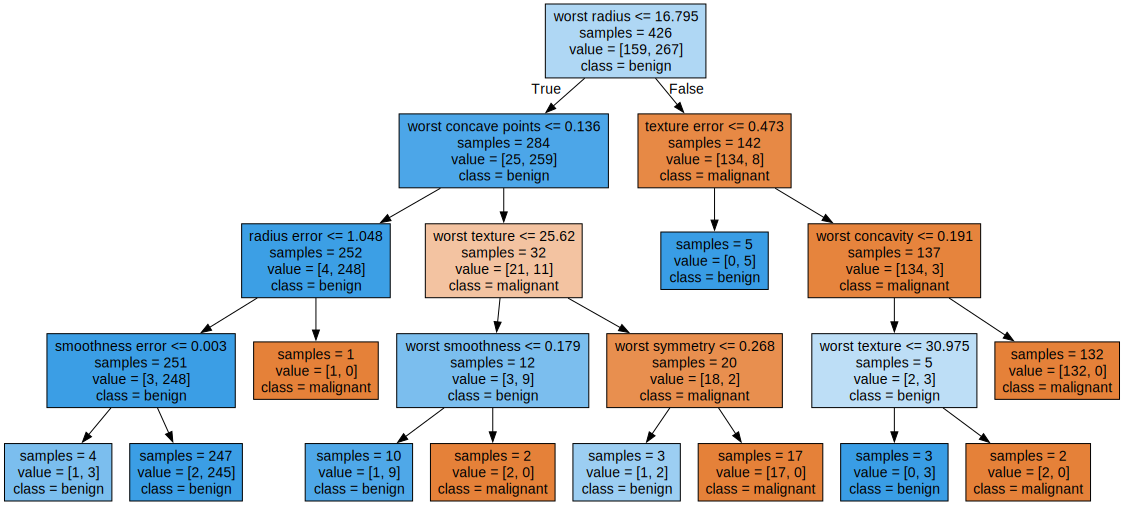

In [13]:
import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

### Feature importance in trees

Instead of looking at the whole tree, which can be taxing, there are some useful prop‐
erties that we can derive to summarize the workings of the tree. 

The most commonly used summary is feature importance, which rates how important each feature is for the decision a tree makes.

It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature
importances always sum to 1

In [14]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


We can visualize the feature importances in a way that is similar to the way we visual‐
ize the coefficients in the linear model 

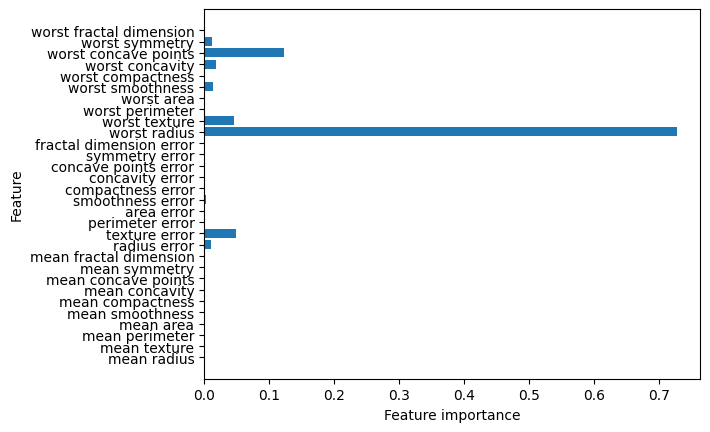

In [17]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_cancer(model):
 n_features = cancer.data.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), cancer.feature_names)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

In fact, there might not be such a simple relation‐
ship between features and class, as you can see in the following example

Feature importances: [0. 1.]


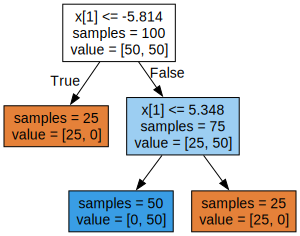

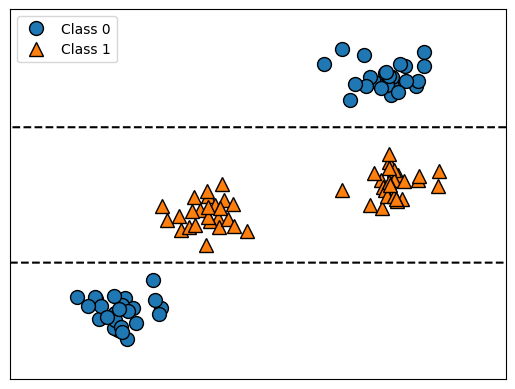

In [19]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)